In [1]:
# Imports
import csv
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
### Reading Provided Data

In [3]:
# File Names
xs_file = '/Users/briannaryan/Desktop/CEvNS/Detector Material Comparison/tin_xs.csv'

In [4]:
### Defining All Variables

In [5]:
# Defining Known Variables
N_A = 6.0221408*10**(23)  #atoms/mole
A = 112*0.0097+114*0.0065+115*0.0034+116*0.1454+117*0.0768+118*0.2422+119*0.0858+120*0.3259+122*0.0463+124*0.0579
mu = 3.10

In [6]:
# Calculate Weighted Average XS (taken from reaction rate code)
avg_xs = 1.42*10**(-41)

In [7]:
# Combining Knowns
constant_term = (4*math.pi*mu*A)/(avg_xs*10**(-4)*N_A*1000000) 
print(constant_term)

5.411723363310939e+18


In [8]:
### Final Calculations

In [9]:
# Now lets break it down! Starting with r=1m
M_s = range(1, 1000000000000, 1000000)  # Mega to Peta

r1 = 1
M_dec_r1 = []
for m in M_s:
    M_dec_r1.append(constant_term*r1**2/(m*60*1000000))

r2 = 2
M_dec_r2 = []
for m in M_s:
    M_dec_r2.append(constant_term*r2**2/(m*60*1000000))
    
r3 = 3
M_dec_r3 = []
for m in M_s:
    M_dec_r3.append(constant_term*r3**2/(m*60*1000000))

r4 = 5
M_dec_r4 = []
for m in M_s:
    M_dec_r4.append(constant_term*r4**2/(m*60*1000000))

r5 = 10
M_dec_r5 = []
for m in M_s:
    M_dec_r5.append(constant_term*r5**2/(m*60*1000000))

In [10]:
M_s_new = []
for m in M_s :
    M_s_new.append(m*10**6)

In [11]:
Ci = 3.7*10**10  #Ci to Bq conversion

case_1 = 348*10**6
case_2 = 12*10**(-3)*Ci
print(case_2)

444000000.0


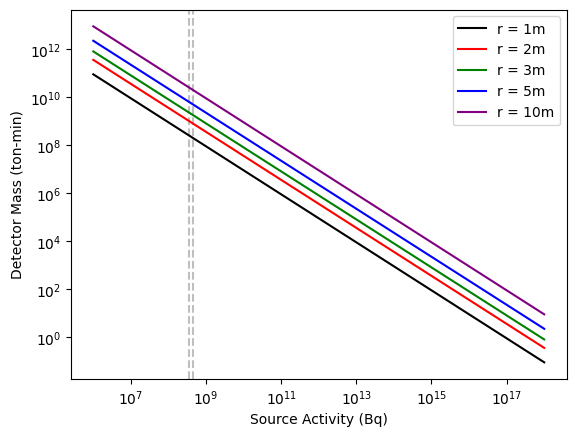

In [14]:
plt.axvline(x=case_1, color='grey', ls='dashed', alpha=0.5)
plt.axvline(x=case_2, color='grey', ls='dashed', alpha=0.5)
plt.plot(M_s_new, M_dec_r1, color='black', label='r = 1m')
plt.plot(M_s_new, M_dec_r2, color='red', label='r = 2m')
plt.plot(M_s_new, M_dec_r3, color='green', label='r = 3m')
plt.plot(M_s_new, M_dec_r4, color='blue', label='r = 5m')
plt.plot(M_s_new, M_dec_r5, color='purple', label='r = 10m')

plt.legend()
plt.xlabel('Source Activity (Bq)')
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Detector Mass (ton-min)')
plt.savefig('Co-57_results.png')

In [13]:
# Use as calculator 
md = constant_term * 1**2 * 1000000/(case_1*60*1000000)
print("Case 1 Detection @ 1m: " + str(md))
md = constant_term * 5**2 * 1000000/(case_1*60*1000000)
print("Case 1 Detection @ 5m: " + str(md))

md_2 = constant_term * 1**2 * 1000000/(case_2*60*1000000)
print("Case 2 Detection @ 1m: " + str(md_2))
md_2 = constant_term * 5**2 * 1000000/(case_2*60*1000000)
print("Case 2 Detection @ 5m: " + str(md_2))

Case 1 Detection @ 1m: 259182153.41527483
Case 1 Detection @ 5m: 6479553835.381871
Case 2 Detection @ 1m: 203142768.89305326
Case 2 Detection @ 5m: 5078569222.326332
